# Weather data: Explorative analysis

**Author: Jakob Nyström, 5563**

In this notebook we do some basic explorative analysis of weather data collected from SMHI (temperature and precipitation).

In [99]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
import warnings
from typing import List

In [100]:
# Load Black for code formatting
import jupyter_black

jupyter_black.load(lab=False)

## 1. Load and join lake and weather data

In order to run the analysis, we need to load and join the dependent variables from the lake chemistry data set.

In [101]:
# Load weather data set
df_met = pd.read_csv("../data/weather_data_clean.csv")
df_met.head()

,MD-MVM Id,Survey station,Latitude,Longitude,Sample date,Temp station id,Temp station dist,Temp station name,Precip station id,Precip station dist,...,Precip 1w avg,Precip 1w acc,Precip 2w avg,Precip 2w acc,Precip 4w avg,Precip 4w acc,Precip 12w avg,Precip 12w acc,Precip 52w avg,Precip 52w acc
0,54,Spjutsjön,60.638793,15.445276,2001-03-28,105370,11.8,Falun-Lugnet,105470,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54,Spjutsjön,60.638793,15.445276,2001-05-21,105370,11.8,Falun-Lugnet,105470,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,Spjutsjön,60.638793,15.445276,2001-08-22,105370,11.8,Falun-Lugnet,105470,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,Spjutsjön,60.638793,15.445276,2001-10-15,105370,11.8,Falun-Lugnet,105470,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54,Spjutsjön,60.638793,15.445276,2002-02-26,105370,11.8,Falun-Lugnet,105470,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Inspect shape
df_met.shape

(8974, 30)

In [103]:
# Load lake chemistry data set
df_lake = pd.read_csv("../data/lake_chem_data_clean.csv")
df_lake.head()

,MD-MVM Id,Survey station,Latitude,Longitude,County,Municipality,MS_CD C3,Sample date,Sample year,Sample month,...,Water temp (°C),Tot-N (µg/l N),Abs_F 420 (/m),SUVA_254 (m*l/mg),Organic N (µg/l N),Inorganic N (µg/l N),TOC:TON (mol/l),Organic P (µg/l N),Inorganic P (µg/l N),TOC:TOP (mol/l)
0,54,Spjutsjön,60.638793,15.445276,Dalarnas län,Falun,WA42559716,2001-03-28,2001,3,...,0.6,409.0,1.06,NaN,201.0,208.0,61.513265,7.0,402.0,7809.079772
1,54,Spjutsjön,60.638793,15.445276,Dalarnas län,Falun,WA42559716,2001-05-21,2001,5,...,10.2,360.0,1.02,NaN,256.0,104.0,37.362236,4.0,356.0,10571.725918
2,54,Spjutsjön,60.638793,15.445276,Dalarnas län,Falun,WA42559716,2001-08-22,2001,8,...,18.6,195.0,0.58,NaN,185.0,10.0,107.185530,4.0,191.0,21916.992757
3,54,Spjutsjön,60.638793,15.445276,Dalarnas län,Falun,WA42559716,2001-10-15,2001,10,...,10.3,383.0,0.70,NaN,353.0,30.0,28.417294,6.0,377.0,7391.613243
4,54,Spjutsjön,60.638793,15.445276,Dalarnas län,Falun,WA42559716,2002-02-26,2002,2,...,1.5,385.0,0.70,NaN,203.0,182.0,55.161258,7.0,378.0,7072.374133


In [104]:
# Check that shape matches the other dataframe
df_lake.shape

(8974, 51)

In [105]:
# Keep dependent variable columns from lake data
df_lake = df_lake[
    [
        "MD-MVM Id",
        "Survey station",
        "Sample date",
        "TOC (mg/l C)",
        "Abs_F 420 (/m)",
        "SUVA_254 (m*l/mg)",
        "TOC:TON (mol/l)",
        "TOC:TOP (mol/l)",
    ]
]
df_lake.head()

,MD-MVM Id,Survey station,Sample date,TOC (mg/l C),Abs_F 420 (/m),SUVA_254 (m*l/mg),TOC:TON (mol/l),TOC:TOP (mol/l)
0,54,Spjutsjön,2001-03-28,5.3,1.06,NaN,61.513265,7809.079772
1,54,Spjutsjön,2001-05-21,4.1,1.02,NaN,37.362236,10571.725918
2,54,Spjutsjön,2001-08-22,8.5,0.58,NaN,107.185530,21916.992757
3,54,Spjutsjön,2001-10-15,4.3,0.70,NaN,28.417294,7391.613243
4,54,Spjutsjön,2002-02-26,4.8,0.70,NaN,55.161258,7072.374133


In [106]:
# Join select columns from weather data to create one dataframe
df_join = df_lake.join(
    df_met[
        [
            "MD-MVM Id",
            "Sample date",
            "Temp 1w avg",
            "Temp 2w avg",
            "Temp 4w avg",
            "Temp 12w avg",
            "Temp 52w avg",
            "Precip 1w avg",
            "Precip 2w avg",
            "Precip 4w avg",
            "Precip 12w avg",
            "Precip 52w avg",
            "Precip 1w acc",
            "Precip 2w acc",
            "Precip 4w acc",
            "Precip 12w acc",
            "Precip 52w acc",
        ]
    ].set_index(["MD-MVM Id", "Sample date"]),
    on=["MD-MVM Id", "Sample date"],
)
df_join.head()

,MD-MVM Id,Survey station,Sample date,TOC (mg/l C),Abs_F 420 (/m),SUVA_254 (m*l/mg),TOC:TON (mol/l),TOC:TOP (mol/l),Temp 1w avg,Temp 2w avg,...,Precip 1w avg,Precip 2w avg,Precip 4w avg,Precip 12w avg,Precip 52w avg,Precip 1w acc,Precip 2w acc,Precip 4w acc,Precip 12w acc,Precip 52w acc
0,54,Spjutsjön,2001-03-28,5.3,1.06,NaN,61.513265,7809.079772,-5.285714,-5.635714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54,Spjutsjön,2001-05-21,4.1,1.02,NaN,37.362236,10571.725918,8.985714,11.342857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,Spjutsjön,2001-08-22,8.5,0.58,NaN,107.185530,21916.992757,16.700000,15.857143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,Spjutsjön,2001-10-15,4.3,0.70,NaN,28.417294,7391.613243,8.914286,9.371429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54,Spjutsjön,2002-02-26,4.8,0.70,NaN,55.161258,7072.374133,-5.842857,-2.942857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df_join.shape

(8974, 23)

## 2. Data coverage per lake over time

SMHI's weather data is not fully consistent, since stations are activated and deactivated during the time of our panel data on the lake chemistry. We therefore check the availability of data for each lake.

### 2.1. Temperature, 52w rolling average

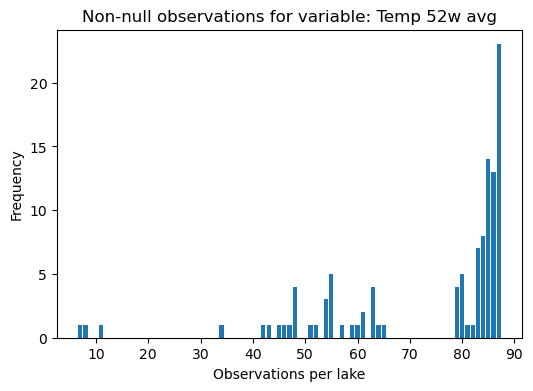

In [127]:
# Calculate number of observations per lake
obs_count = df_join.groupby("MD-MVM Id")["Temp 52w avg"].count()
count_series = pd.Series(obs_count).value_counts().sort_index()

# Plot the observation count
plt.figure(figsize=(6, 4))
plt.bar(count_series.index, count_series.values)

plt.xlabel("Observations per lake")
plt.ylabel("Frequency")
plt.title("Non-null observations for variable: Temp 52w avg")

plt.show()

### 2.1. Precipitation, 52w rolling average

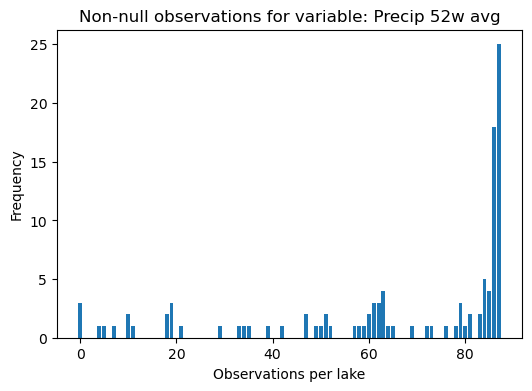

In [129]:
# Calculate number of observations per lake
obs_count = df_join.groupby("MD-MVM Id")["Precip 52w avg"].count()
count_series = pd.Series(obs_count).value_counts().sort_index()

# Plot the observation count
plt.figure(figsize=(6, 4))
plt.bar(count_series.index, count_series.values)

plt.xlabel("Observations per lake")
plt.ylabel("Frequency")
plt.title("Non-null observations for variable: Precip 52w avg")

plt.show()

In [110]:
# Function to generate and save plots for a specific lake and set of variables
def generate_data_availability_plots(lake_id, ax):
    """
    Generates and saves plots for a specific lake and set of variables. Used to 
    visualize availability of data across lakes.

    Args:
        lake_id: The unique identifier of the lake for which data plots are generated.
        ax: The axes object on which the plots will be created.
    """
    
    # Filter data for the specific lake
    lake_data = df_join[df_join["MD-MVM Id"] == lake_id]
    lake_data = lake_data.sort_values(by="Sample date")

    # Plot 52w average temperature on the first axis
    ax.plot(lake_data.index, lake_data["Temp 52w avg"], color="b")

    # Create a second y-axis for the second variable
    ax2 = ax.twinx()
    ax2.plot(lake_data.index, lake_data["Precip 52w avg"], color="r")

    # Set a title for the plot
    ax.set_title(f"{lake_id}: {lake_data['Survey station'].unique()[0]}")

    # Remove x and y-axis tick numbers
    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_yticks([])

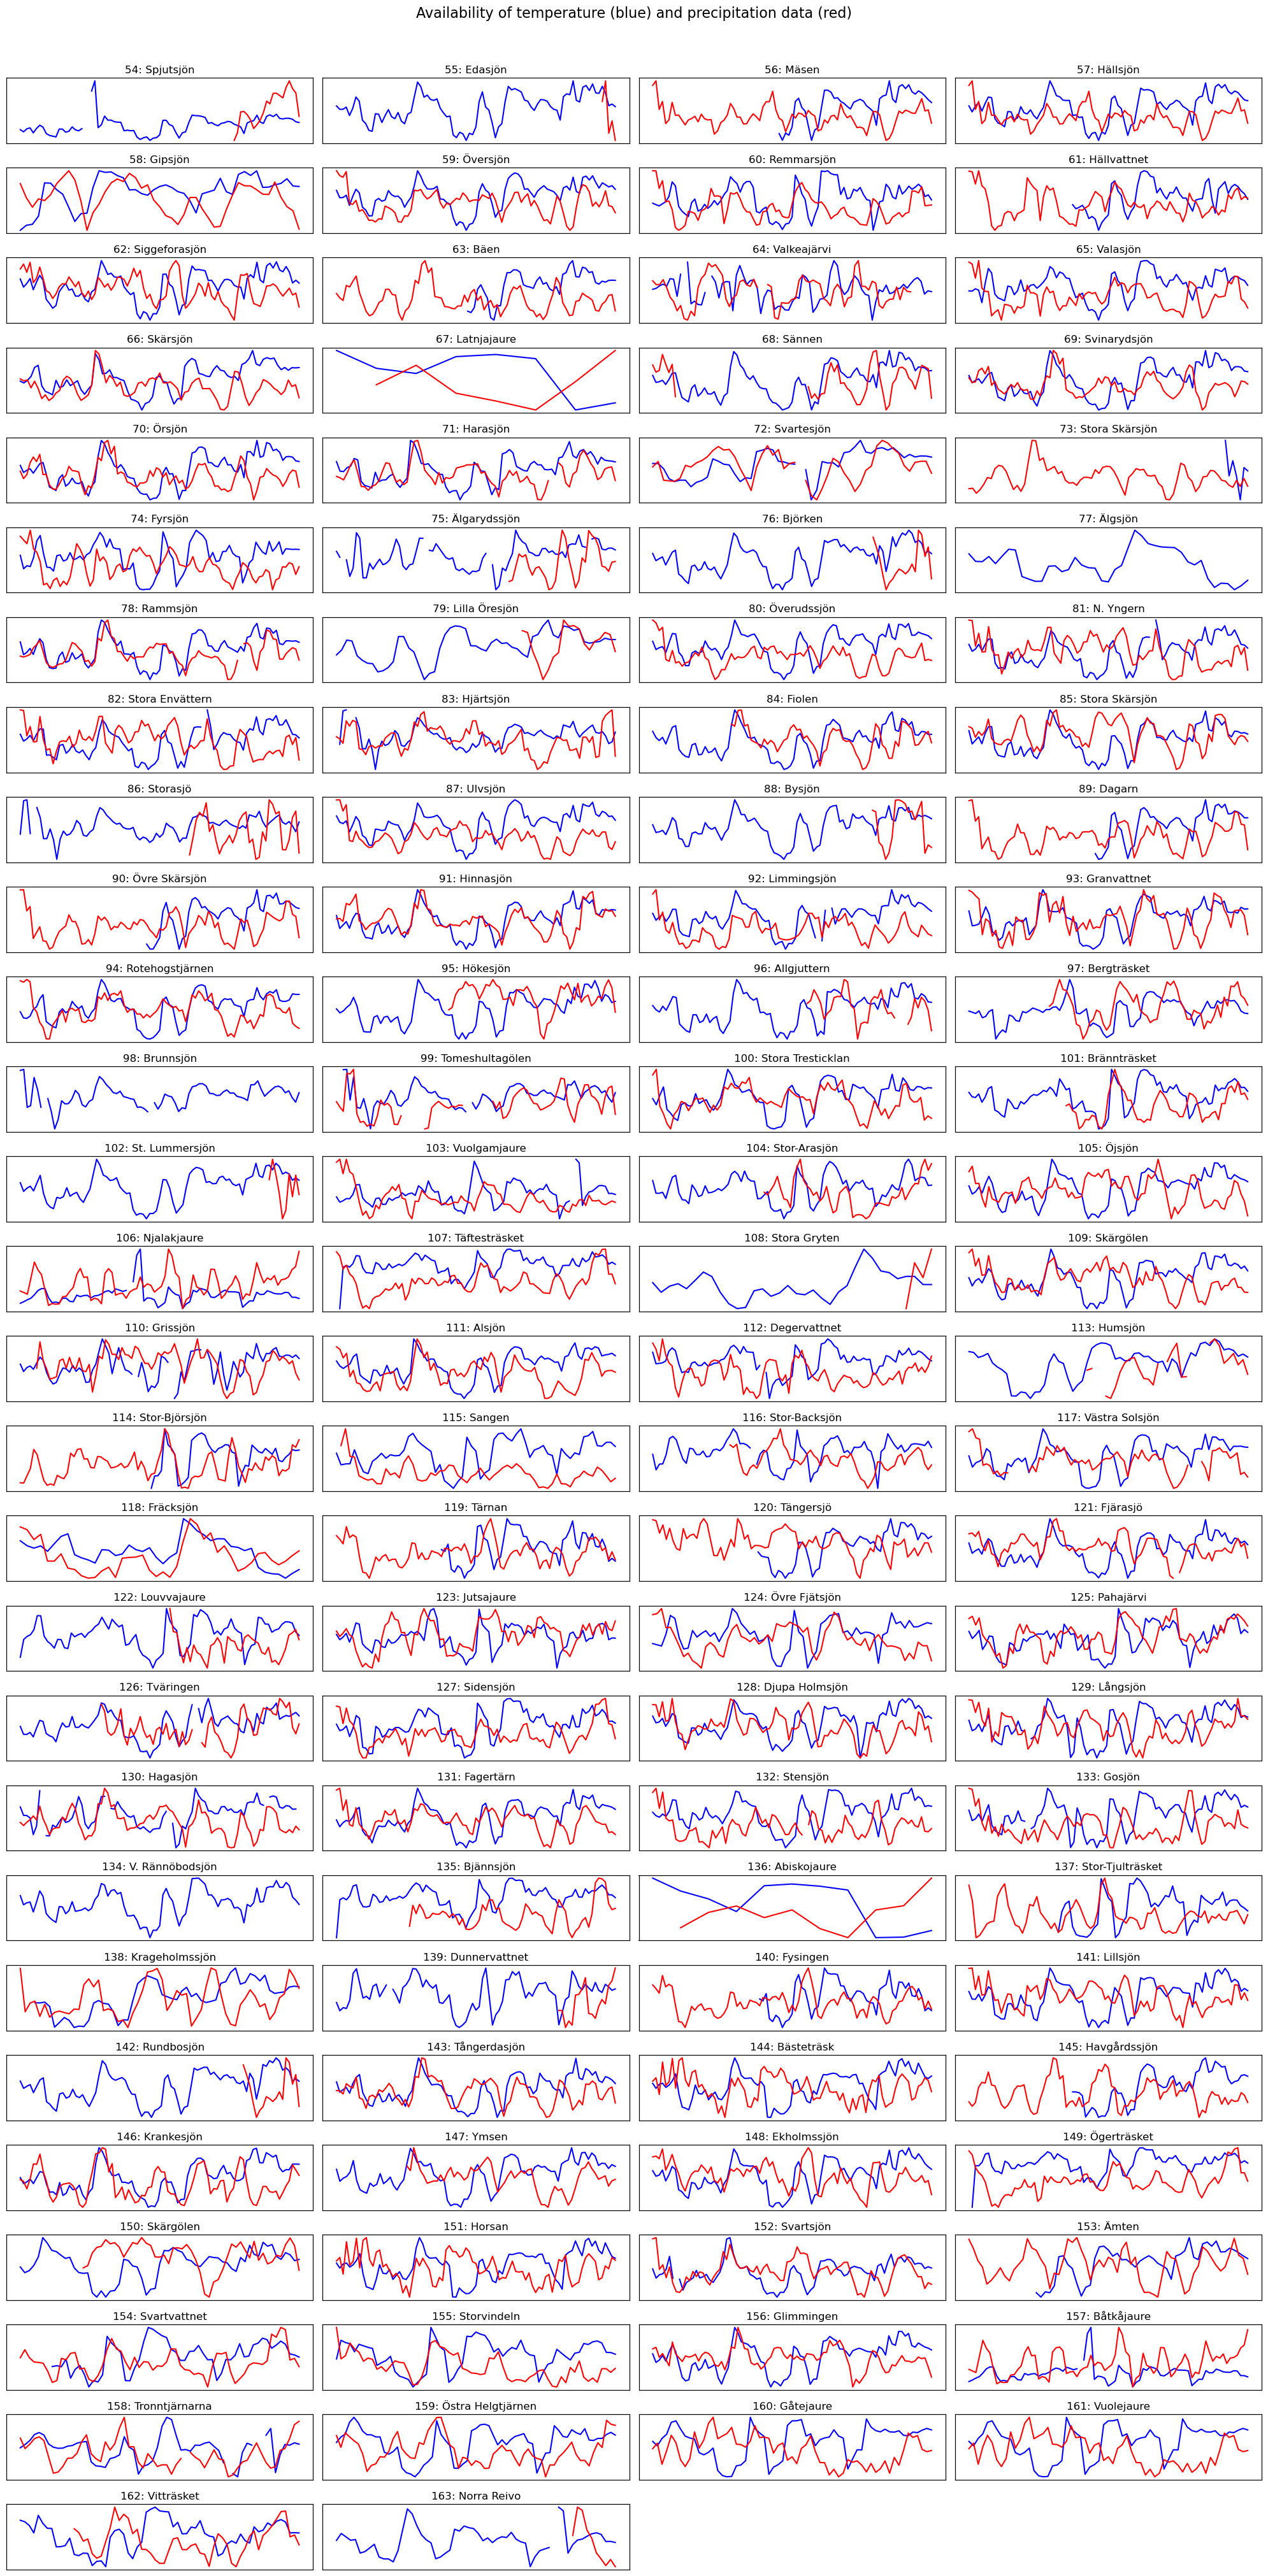

In [111]:
list_of_lakes = list(df_join["MD-MVM Id"].unique())

# Calculate the number of rows and columns for the subplot grid
num_lakes = len(list_of_lakes)
num_cols = 4
num_rows = ceil(num_lakes / num_cols)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Generate and save plots for each lake in the subplot grid
for i, lake_id in enumerate(list_of_lakes):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    generate_data_availability_plots(lake_id, ax)

# Remove empty subplots
for i in range(len(list_of_lakes), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

fig.suptitle(
    "Availability of temperature (blue) and precipitation data (red)",
    y=1.01,
    fontsize=16,
)
plt.tight_layout()

plt.show()

**Conclusion:** There are quite a few gaps in the weather data, especially for precipitation. This is something that needs to be accounted for when we start modelling.

## 3. Validate how close SMHI stations are to lakes

As noted in the data collection and processing notebook, the distance between lakes and their closest SMHI stations will vary. Here we check the distribution of those distances. 

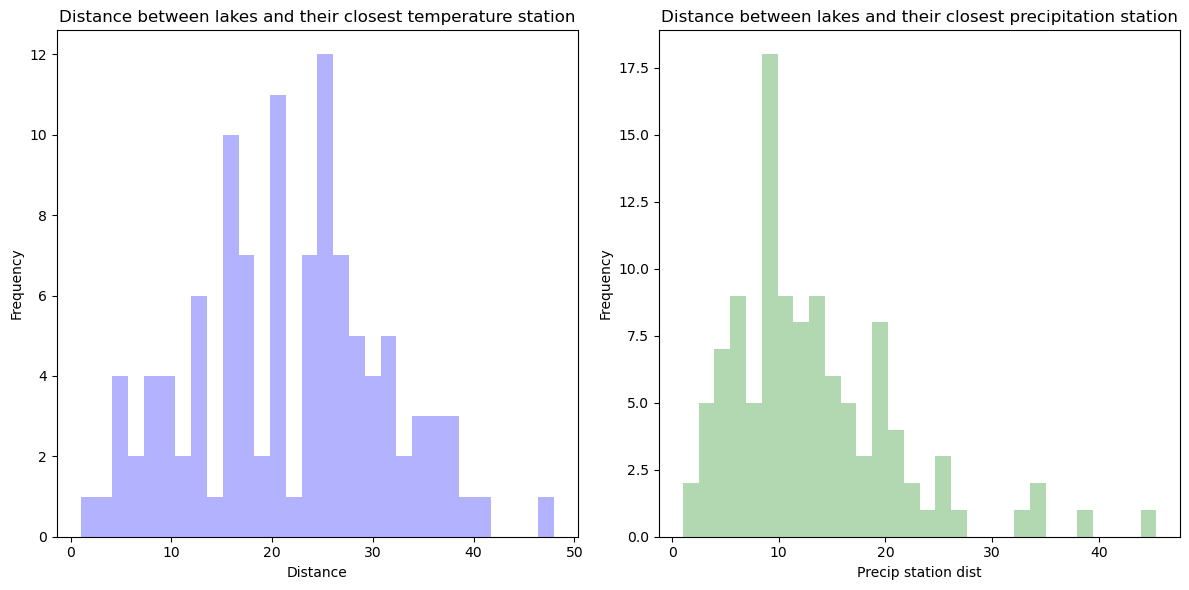

In [131]:
# Group by lake id
grouping = df_met.groupby("MD-MVM Id").agg(
    {"Temp station dist": "mean", "Precip station dist": "mean"}
)

# Plotting histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for 'Temp station dist'
ax[0].hist(grouping["Temp station dist"], bins=30, alpha=0.3, color="blue")
ax[0].set_title("Distance between lakes and their closest temperature station")
ax[0].set_xlabel("Distance")
ax[0].set_ylabel("Frequency")

# Histogram for 'Precip station dist'
ax[1].hist(grouping["Precip station dist"], bins=30, alpha=0.3, color="green")
ax[1].set_title("Distance between lakes and their closest precipitation station")
ax[1].set_xlabel("Precip station dist")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**Conclusion:** Almost all temperature measurements are within 40 km of the lake, which is probably fine; the temperature is unlikely to vary that much within such a distance. Precipitation is more local, and here most stations are within 30 km. This could imply that this metric is more coarse than ideally wanted.

## 4. Density and outlier analysis

### 4.1. Distribution density of dependent and explanatory variables

Many models rely on the model errors / residuals being normally distributed, which is typically related to the dependent variable being Gaussian. Further, large skews in covariates can distort the model and make it generalize less well, implying a need for e.g. log transformations. 

In [113]:
# Select relevant data for which we want to plot densities
df_outlier = df_join[
    [
        "Temp 1w avg",
        "Temp 2w avg",
        "Temp 4w avg",
        "Temp 12w avg",
        "Temp 52w avg",
        "Precip 1w avg",
        "Precip 2w avg",
        "Precip 4w avg",
        "Precip 12w avg",
        "Precip 52w avg",
        "Precip 1w acc",
        "Precip 2w acc",
        "Precip 4w acc",
        "Precip 12w acc",
        "Precip 52w acc",
    ]
]

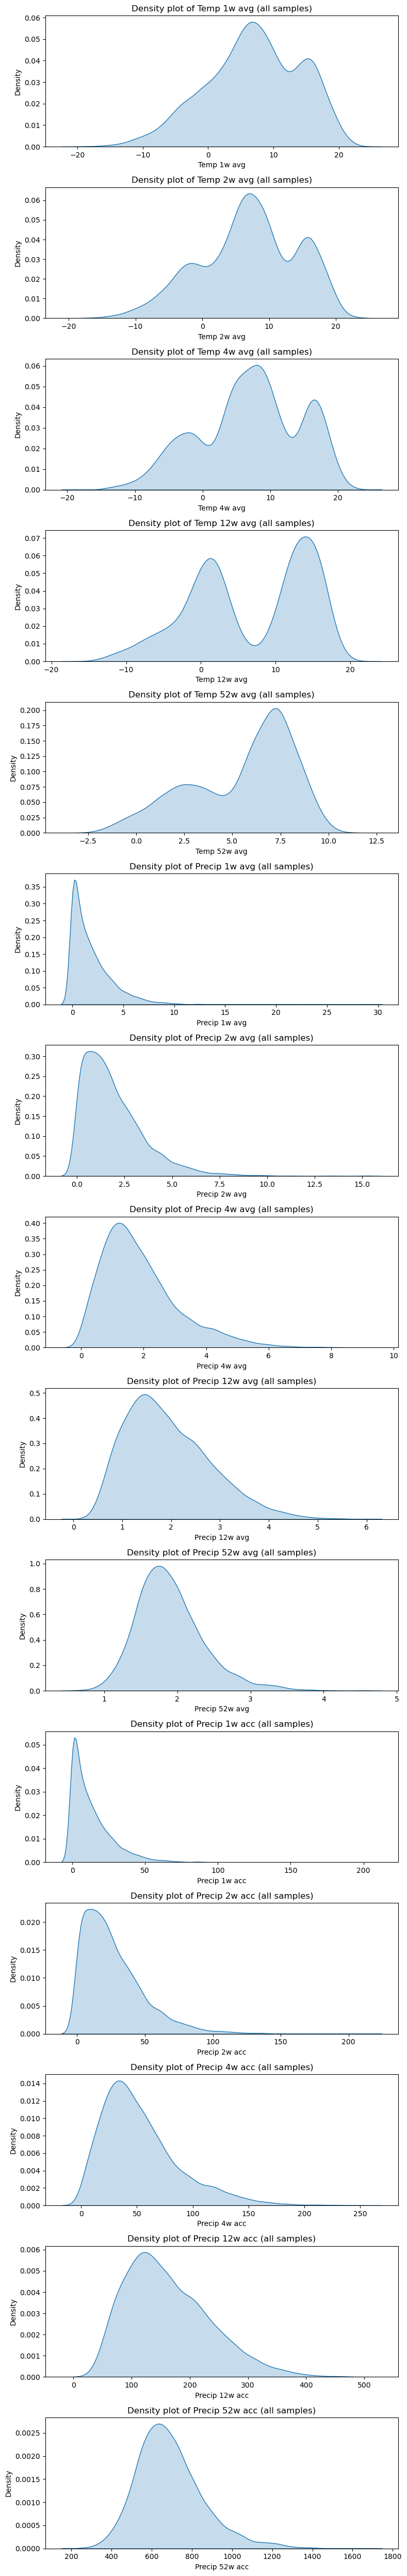

In [114]:
# Plot the distribution density of each relevant variable
fig, axes = plt.subplots(nrows=len(df_outlier.columns), ncols=1, figsize=(8, 50))

# Create density plots for each variable
for i, column in enumerate(df_outlier.columns):
    ax = axes[i]
    sns.kdeplot(df_outlier[column], ax=ax, fill=True)
    ax.set_title(f"Density plot of {column} (all samples)")


plt.tight_layout()
plt.show()

**Conclusion:** Temperature variables follow multi-modal distributions due to the presence of different seasons. Precipitation is approximately Gamma distributed with long tails. 

## 5. Correlation analysis

To get a quick view of what variables are more correlated with the dependent variables that we are interested in, we perform correlation analysis. We primarly do it by calculating and plotting the correlation between each potential dependent variable, and relevant covariates, in a bar plot that is easy to visualize. We can also visualize correlation across all variables in a heatmap, although this is harder to digest.
<br><br>
Based on the learnings from analyzing the lake chemistry data, we only evaluate Spearman rank correlation, due to the presence of nonlinear relationships in data across the whole population.

In [115]:
# Function to generate correlation bar plots
def create_corr_barplot(
    df: pd.DataFrame, features: List[str], dependent_var: str, method: str
):
    """
    Generate a correlation bar plot to visualize the correlation of
    features with a dependent variable.

    Args:
        df: Dataframe containing the dataset with all features.
        features: List of feature column names to calculate correlations.
        dependent_var: The name of the dependent variable column.
        method: Correlation method to use (e.g., 'pearson', 'spearman', 'kendall').
    """
    corr_data = df[features]

    # Calculate the correlation matrix
    correlation_matrix = corr_data.sample(frac=1).corr(method=method)

    # Extract the correlation values with the covariates for the dependent variable
    corr_values = correlation_matrix[dependent_var][1:].sort_values(ascending=False)

    # Create a bar plot for sorted correlations using Seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=corr_values.values,
        y=corr_values.index,
        hue=corr_values.index,
        palette="coolwarm_r",
        legend=False,
    )
    plt.gca().invert_xaxis()

    # Position the correlation numbers correctly
    for i, val in enumerate(corr_values.values):
        if val < 0:
            plt.text(val, i, f"{val:.2f}", ha="left", va="center")
        else:
            plt.text(val, i, f"{val:.2f}", ha="right", va="center")

    plt.ylabel("Features")
    plt.title(f"Correlation with {dependent_var} ({method})")

    plt.show()

In [116]:
# Selec that covariates that we want to use for the correlation analysis
explan_var = [
    "Temp 1w avg",
    "Temp 2w avg",
    "Temp 4w avg",
    "Temp 12w avg",
    "Temp 52w avg",
    "Precip 1w avg",
    "Precip 2w avg",
    "Precip 4w avg",
    "Precip 12w avg",
    "Precip 52w avg",
    "Precip 1w acc",
    "Precip 2w acc",
    "Precip 4w acc",
    "Precip 12w acc",
    "Precip 52w acc",
]

### 5.1. Total organic carbon (TOC)

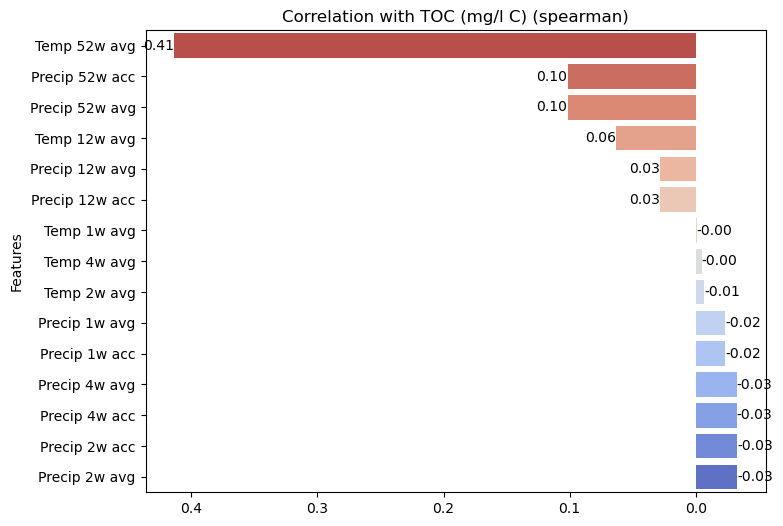

In [132]:
# Select features and generate correlation plot
toc_var = ["TOC (mg/l C)"] + explan_var
create_corr_barplot(df_join, toc_var, "TOC (mg/l C)", method="spearman")

### 5.2. Absorbance 420 nm

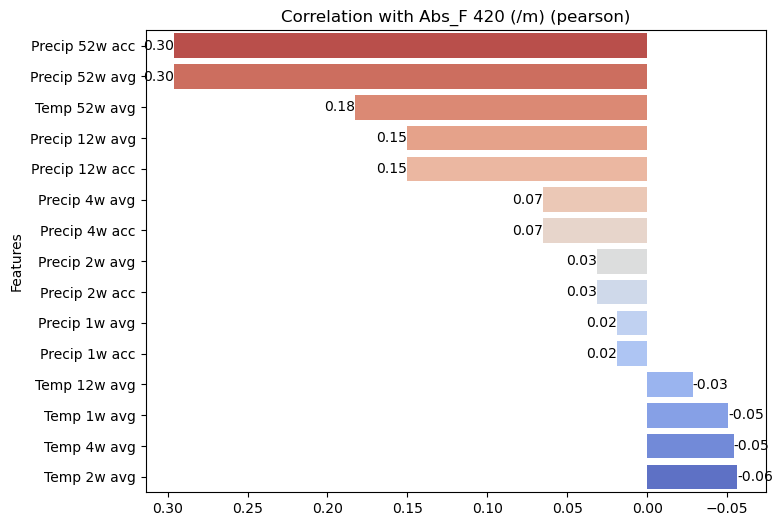

In [118]:
abs_var = ["Abs_F 420 (/m)"] + explan_var
create_corr_barplot(df_join, abs_var, "Abs_F 420 (/m)", method="pearson")

### 5.3. SUVA 254 nm

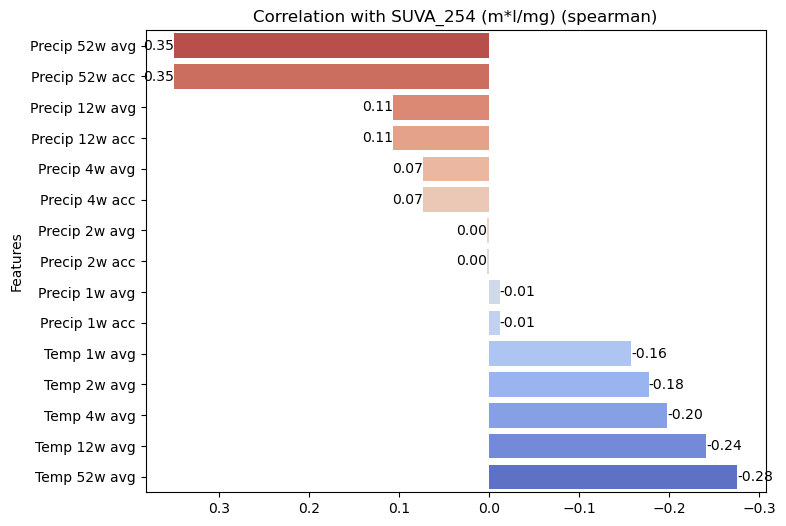

In [119]:
suva_var = ["SUVA_254 (m*l/mg)"] + explan_var
create_corr_barplot(df_join, suva_var, "SUVA_254 (m*l/mg)", method="spearman")

### 5.4. TOC:TON ratio

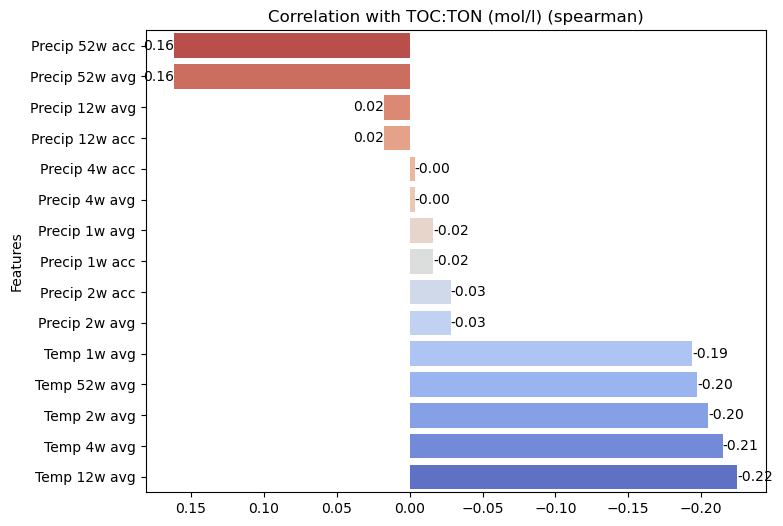

In [120]:
toc_ton_var = ["TOC:TON (mol/l)"] + explan_var
create_corr_barplot(df_join, toc_ton_var, "TOC:TON (mol/l)", method="spearman")

### 5.5. TOC:TOP ratio

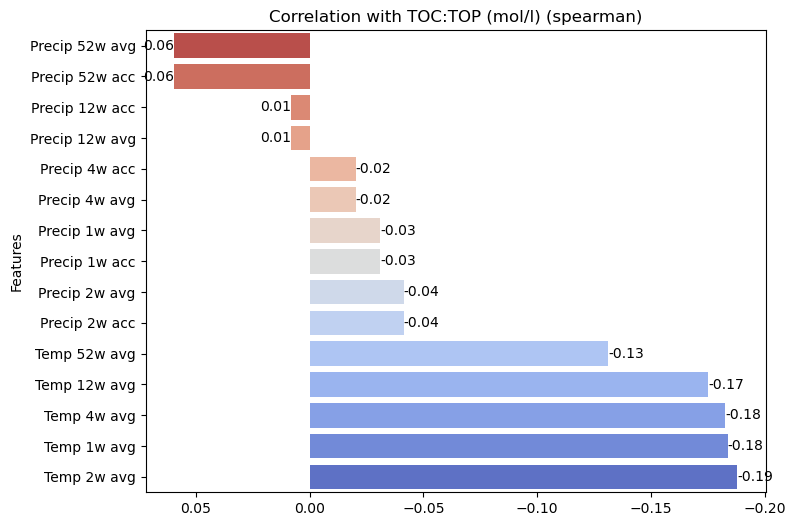

In [121]:
toc_top_var = ["TOC:TOP (mol/l)"] + explan_var
create_corr_barplot(df_join, toc_top_var, "TOC:TOP (mol/l)", method="spearman")

## 6. Autocorrelation analysis

Similar to the lake chemistry data, there is potentially time autocorrelation present in the weather variables. Thereforewe compute the correlation between each feature and its lagged instances.

In [122]:
def calculate_autocorrelation(
    df: pd.DataFrame, variables: list, order: int = 1
) -> pd.Series:
    """
    Calculate autocorrelation for the specified variables in a dataframe,
    according to the order specified, e.g. AR(1), AR(2), etc.

    Args:
        df: Dataframe containing data for all lakes and variables.
        variables: A list of variable names for which to calculate autocorrelation.
        order: The order of the autocorrelation. Default is 1.

    Returns:
        lagged_corr: A series containing the autocorrelation values for each variable.
    """

    # Sort dataframe by lake id and sample date
    df = df.sort_values(["MD-MVM Id", "Sample date"], ascending=True)

    # Group by the lake id column
    grouped = df.groupby("MD-MVM Id")[lagged_corr_var]

    # Create an empty DataFrame to store the results
    corr_result = pd.DataFrame(index=lagged_corr_var)

    # Loop through each lake grouping
    for lake_name, lake_data in grouped:
        # Calculate the correlation between original and lagged variables for this lake
        lagged_data = lake_data.shift(order)
        corr = pd.Series(
            lake_data.corrwith(lagged_data, axis=0, method="spearman"), name=lake_name
        )

        # Append the correlations to the results dataframe
        corr_result = corr_result.join(corr)

    # Calculate the average across all groups for each variable
    corr_result["Avg correlation"] = corr_result.mean(axis=1)
    lagged_corr = corr_result["Avg correlation"]

    return lagged_corr

In [123]:
def plot_autocorrelation(lagged_corr: pd.Series):
    """
    Plot the autocorrelation results in a sorted bar plot.

    Args:
        lagged_corr: A series containing autocorrelation values for different
            variables.
    """
    lagged_corr = lagged_corr.sort_values(ascending=False)

    # Create a bar plot for sorted correlations using Seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=lagged_corr.values,
        y=lagged_corr.index,
        hue=lagged_corr.index,
        palette="coolwarm_r",
        legend=False,
    )
    plt.gca().invert_xaxis()

    # Position the correlation numbers correctly
    for i, val in enumerate(lagged_corr.values):
        if val < 0:
            plt.text(val, i, f"{val:.2f}", ha="left", va="center")
        else:
            plt.text(val, i, f"{val:.2f}", ha="right", va="center")

    plt.ylabel("Features")
    plt.title(
        f"Autocorrelation of explanatory variables (within each lake, averaged across lakes)"
    )

    plt.show()

In [124]:
# Select covariates to include in the analysis
lagged_corr_var = [
    "Temp 1w avg",
    "Temp 2w avg",
    "Temp 4w avg",
    "Temp 12w avg",
    "Temp 52w avg",
    "Precip 1w avg",
    "Precip 2w avg",
    "Precip 4w avg",
    "Precip 12w avg",
    "Precip 52w avg",
    "Precip 1w acc",
    "Precip 2w acc",
    "Precip 4w acc",
    "Precip 12w acc",
    "Precip 52w acc",
]

### 6.1. First order autocorrelation

Correlation between each variable and itself one time period ago.

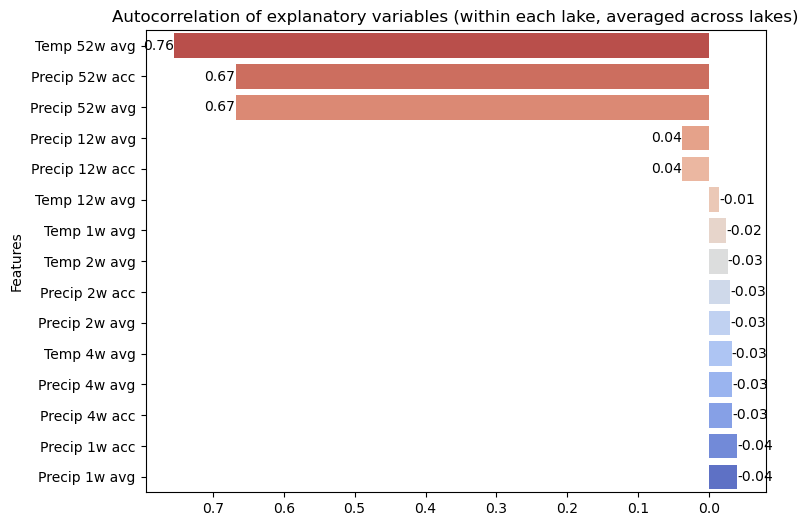

In [125]:
lagged_corr_1 = calculate_autocorrelation(df_join, lagged_corr_var, order=1)
plot_autocorrelation(lagged_corr_1)

### 6.2. Second order autocorrelation

Correlation between each variable and itself two time periods ago.

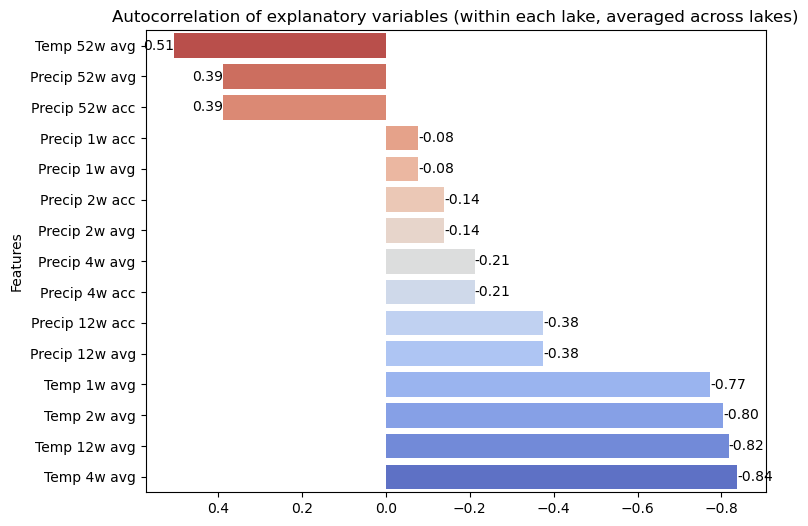

In [126]:
lagged_corr_2 = calculate_autocorrelation(df_join, lagged_corr_var, order=2)
plot_autocorrelation(lagged_corr_2)

**Conclusion:** The plots show that the 52w variables are highly positively correlated. This is somewhat misleading, as such long rolling average periods will have overlaps in the underlying data (since we have rolling average per sample date, roughly every 3 months). Most of the shorter rolling average windows are negatively correlated. This is probably just an indication that there is high variability in weather across time periods longer than a week.